# Running Open Source AI Models from Hugging Face

by [Alberto Falossi](https://github.com/falox)

This notebook shows you how to use one of the thousands of [open source AI models](https://opensource.org/deepdive/drafts/the-open-source-ai-definition-draft-v-0-0-8) hosted on [Hugging Face](https://hf.co) (HF). Use these examples to quickly test the behavior of the different models and validate your ideas.

The easiest way to run the notebook is via [Google Colab](https://colab.research.google.com/drive/). But you can run it in any [Jupyter Notebook](https://jupyter.org/try) environment or copy/paste the code into a Python 3.8+ terminal.

## Setup your environment

Most calls to Hugging Face require authentication.

*   Obtain your HF token from https://huggingface.co/settings/tokens and follow the [authentication instructions](https://huggingface.co/docs/huggingface_hub/en/quick-start#authentication).
*   If you're running the notebook in Google Colab, just store the token in a `HF_TOKEN` [secret](https://huggingface.co/docs/huggingface_hub/en/quick-start#environment-variable).

## Define the model and the prompt

Choose the model you want to run. Typically, the main path to the repo is used as the `MODEL_ID` (`https://huggingface.co/mistralai/Mistral-7B-v0.1` -> `mistralai/Mistral-7B-v0.1`).

Define the prompt according to the specific syntax of the model.

In [1]:
# MODEL_ID = "mistralai/Mistral-7B-v0.1"
MODEL_ID = "mistralai/Mistral-7B-Instruct-v0.1"
# MODEL_ID =  "mistralai/Mixtral-8x7B-Instruct-v0.1"

# the prompt syntax is different for each model (see the model documentation)
def format_prompt(text):
  return f"<s>[INST] {text} [/INST]" # Mistral

prompt = format_prompt("Can you give me the recipe for pizza?")

## Running a model remotely

This is the official HF client API to run a model remotely. Not all models are available via the API.

See https://huggingface.co/docs/huggingface_hub/main/en/guides/inference for the parameters

In [2]:
!pip install --quiet --upgrade huggingface_hub

In [3]:
from huggingface_hub import InferenceClient

model = InferenceClient(model=MODEL_ID)
output = model.text_generation(prompt, max_new_tokens=200)

print(output)

 Sure! Here is a simple recipe for pizza that you can try at home:

Ingredients:
- 1 (16.5 oz) refrigerated pizza dough
- 1 (8 oz) package cream cheese, softened
- 1/2 cup shredded cheddar cheese
- 1/2 cup sour cream
- 1/4 teaspoon garlic powder
- 1/4 teaspoon onion powder
- 1/4 teaspoon dried dill weed
- 1/4 teaspoon black pepper
- 1/4 teaspoon salt
- 1 cup chopped fresh broccoli
- 1/2 cup chopped fresh carrots
- 1/2 cup chopped fresh red onion
- 1/2 cup chopped fresh bell pepper

Instructions:
1. Preheat oven to 350 degrees F (175 degrees C).
2


### Same as above, but using LangChain

[LangChain](https://python.langchain.com/docs/get_started/introduction) is a popular AI abstraction library for interacting with language models. It's compatible with Hugging Face, OpenAI, and many others.

In many tutorials/demos on the web you'll find LangChain instead of the native Inference API.

In [4]:
!pip install --quiet --upgrade langchain-community langchain-core

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 12.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 310.2/310.2 kB 16.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 973.5/973.5 kB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.4/124.4 kB 16.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.3/49.3 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 142.5/142.5 kB 17.0 MB/s eta 0:00:00


In [5]:
# LangChain doesn't read the Google Colab secrets automatically
# You can directly HUGGINGFACEHUB_API_TOKEN
import os
from google.colab import userdata
os.environ["HUGGINGFACEHUB_API_TOKEN"] = userdata.get("HF_TOKEN")

In [6]:
from langchain import HuggingFaceHub

model = HuggingFaceHub(repo_id=MODEL_ID)
output = model(prompt)

print(output)

/usr/local/lib/python3.10/dist-packages/langchain_core/_api/deprecation.py:119: LangChainDeprecationWarning: The class `HuggingFaceHub` was deprecated in LangChain 0.0.21 and will be removed in 0.3.0. Use HuggingFaceEndpoint instead.
  warn_deprecated(
/usr/local/lib/python3.10/dist-packages/langchain_core/_api/deprecation.py:119: LangChainDeprecationWarning: The method `BaseLLM.__call__` was deprecated in langchain-core 0.1.7 and will be removed in 0.3.0. Use invoke instead.
  warn_deprecated(


<s>[INST] Can you give me the recipe for pizza? [/INST] Sure! Here is a simple recipe for pizza that you can try at home:

Ingredients:
- 1 (16.5 oz) refrigerated pizza dough
- 1 (8 oz) package cream cheese, softened
- 1/2 cup shredded cheddar cheese
- 1/2 cup sour cream
- 1/4 teaspoon garlic powder
- 1/4 teaspoon onion powder
- 1


### Not only language models

Hugging Face hosts [several types of models](https://huggingface.co/tasks). This is a text-to-image model, executed via the Inference API:




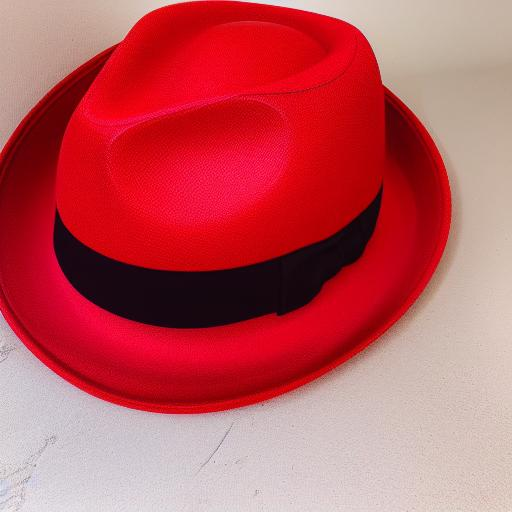

In [7]:
InferenceClient(model="runwayml/stable-diffusion-v1-5").text_to_image("a fedora red hat")

## Running a model locally

Any HF model can be downloaded and run locally, provided you have the right hardware. Be sure to use the latest `transformers` library, which provides a [common interface](https://huggingface.co/docs/transformers/index) for all the models.

> To run this code in Google Colab, switch the runtime to GPU (Runtime -> Change Runtime -> T4 GPU). The notebook will run in a container in the Google cloud. Don't send any sensitive/confidential data.

> The model will _really run locally_ if you run the code in a local Jupyter notebook or Python 3.8+ terminal.

In [8]:
!pip install --quiet --upgrade transformers
# !pip install git+https://github.com/huggingface/transformers to load the main branch

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.1/9.1 MB 12.3 MB/s eta 0:00:00


In [9]:
!nvidia-smi

Tue Jun  4 09:56:01 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   49C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [10]:
!pip install --qui bitsandbytes accelerate # einops

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.8/119.8 MB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.6/302.6 kB 32.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21.3 MB 69.5 MB/s eta 0:00:00


In [11]:
import torch
import transformers
from transformers import AutoTokenizer, AutoModelForCausalLM

torch.set_default_device("cuda")

# model quantization is needed to run the model in the Google Colab T4 runtime
# it may not be necessary to run it on your laptop
# see https://huggingface.co/blog/4bit-transformers-bitsandbytes
bnb_config = transformers.BitsAndBytesConfig(
    load_in_4bit=True,
    bnb_4bit_use_double_quant=True,
    bnb_4bit_quant_type="nf4",
    bnb_4bit_compute_dtype=torch.bfloat16
)

# download the model
model = transformers.AutoModelForCausalLM.from_pretrained(
    MODEL_ID,
    trust_remote_code=True,
    quantization_config=bnb_config,
    device_map='auto',
)

# download the tokenizer
tokenizer = transformers.AutoTokenizer.from_pretrained(
    MODEL_ID,
)

config.json:   0%|          | 0.00/571 [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/25.1k [00:00<?, ?B/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/9.94G [00:00<?, ?B/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/4.54G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.47k [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/493k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.80M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/72.0 [00:00<?, ?B/s]

In [12]:
%%time

input_tokens = tokenizer(prompt, return_tensors="pt", add_special_tokens=False)

output_tokens = model.generate(
    **input_tokens,
    max_new_tokens=200,
    do_sample=True,
    pad_token_id=tokenizer.eos_token_id
)

output = tokenizer.batch_decode(output_tokens)

print(output[0])

<s> [INST] Can you give me the recipe for pizza? [/INST] Certainly! Here's a classic pizza recipe that serves about 4 people:

Ingredients:
- 1 pound pizza dough
- 2 tablespoons olive oil
- 1 teaspoon salt
- 1 teaspoon dried oregano
- 1 teaspoon dried basil
- 2 cups grated mozzarella cheese
- 1 cup tomato sauce
- Toppings of your choice (such as pepperoni, mushrooms, onions, peppers, etc.)

Instructions:
1. Preheat the oven to 450 degrees Fahrenheit.
2. In a large bowl, combine the olive oil, salt, oregano, and basil. 
3. Divide the dough into two equal parts and roll each part out into a 12-inch pizza shape on a lightly floured surface.
4. Place both pizzas on
CPU times: user 39.1 s, sys: 944 ms, total: 40 s
Wall time: 52.1 s


### Not only language models

Here is the [Bark](https://github.com/suno-ai/bark?tab=readme-ov-file#-usage-in-python) text-to-speech model

In [13]:
from transformers import BarkModel
from transformers import AutoProcessor

model = BarkModel.from_pretrained("suno/bark-small")
processor = AutoProcessor.from_pretrained("suno/bark")

config.json:   0%|          | 0.00/8.80k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.68G [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/torch/nn/utils/weight_norm.py:28: UserWarning: torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.
  warnings.warn("torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.")
/usr/local/lib/python3.10/dist-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


generation_config.json:   0%|          | 0.00/4.91k [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/353 [00:00<?, ?B/s]

speaker_embeddings_path.json:   0%|          | 0.00/61.1k [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/996k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.92M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

In [14]:
%%time

prompt = "Greetings Professor Falken."
voice_preset = "v2/en_speaker_1"

input_tokens = processor(prompt, return_tensors="pt", voice_preset=voice_preset)
output = model.generate(**input_tokens, do_sample=True, pad_token_id=processor.tokenizer.pad_token_id)

from IPython.display import Audio
sampling_rate = model.generation_config.sample_rate
Audio(output[0].cpu().numpy(), rate=sampling_rate)

en_speaker_1_semantic_prompt.npy:   0%|          | 0.00/2.57k [00:00<?, ?B/s]

en_speaker_1_coarse_prompt.npy:   0%|          | 0.00/7.46k [00:00<?, ?B/s]

en_speaker_1_fine_prompt.npy:   0%|          | 0.00/14.8k [00:00<?, ?B/s]

CPU times: user 11.1 s, sys: 118 ms, total: 11.2 s
Wall time: 12.3 s


/usr/local/lib/python3.10/dist-packages/torch/utils/_device.py:78: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return func(*args, **kwargs)
